In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

# multi dimension을 가정하기 때문에 60000,28,28,1)로 만들어줘야함
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0 
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

Using TensorFlow backend.


In [2]:
X_train.shape

(60000, 28, 28, 1)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model1 = Sequential()

# 5X5 feature를 4개 쓰겠다!
model1.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model1.add(MaxPooling2D())
# 마지막 파이벡터를 만드는 명령어 Flatten()
model1.add(Flatten())
model1.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [4]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [5]:
hist1 = model1.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.8288 - acc: 0.7487 - val_loss: 0.4039 - val_acc: 0.8804
Epoch 2/10
 - 11s - loss: 0.3558 - acc: 0.8960 - val_loss: 0.3317 - val_acc: 0.9018
Epoch 3/10
 - 11s - loss: 0.3074 - acc: 0.9105 - val_loss: 0.2709 - val_acc: 0.9225
Epoch 4/10
 - 11s - loss: 0.2692 - acc: 0.9227 - val_loss: 0.2329 - val_acc: 0.9351
Epoch 5/10
 - 11s - loss: 0.2344 - acc: 0.9339 - val_loss: 0.2061 - val_acc: 0.9429
Epoch 6/10
 - 11s - loss: 0.2066 - acc: 0.9413 - val_loss: 0.1820 - val_acc: 0.9497
Epoch 7/10
 - 11s - loss: 0.1839 - acc: 0.9482 - val_loss: 0.1658 - val_acc: 0.9527
Epoch 8/10
 - 12s - loss: 0.1670 - acc: 0.9537 - val_loss: 0.1482 - val_acc: 0.9578
Epoch 9/10
 - 12s - loss: 0.1532 - acc: 0.9572 - val_loss: 0.1392 - val_acc: 0.9608
Epoch 10/10
 - 12s - loss: 0.1418 - acc: 0.9602 - val_loss: 0.1247 - val_acc: 0.9626


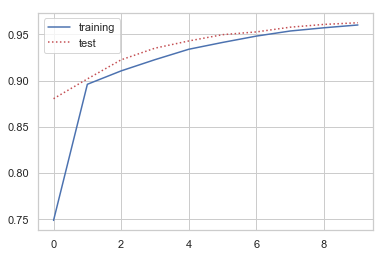

In [6]:
plt.plot(hist1.history['acc'], 'b-', label="training")
plt.plot(hist1.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

#### mnist fashion image

In [8]:
from keras.datasets import fashion_mnist

(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

# multi dimension을 가정하기 때문에 60000,28,28,1)로 만들어줘야함
X_train = X_train0[:, :, :, np.newaxis].astype('float32') / 255.0 
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)

4423680/4422102 [==============================] - 11s 3us/step


In [9]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta
from keras.regularizers import l2


model2 = Sequential()
model2.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model2.add(MaxPooling2D())
model2.add(Flatten())
model2.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))

np.random.seed(0)
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [15]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 4)         104       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 4)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5770      
Total params: 5,874
Trainable params: 5,874
Non-trainable params: 0
_________________________________________________________________


In [16]:
hist2 = model2.fit(X_train, Y_train, epochs=20, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 11s - loss: 1.0134 - acc: 0.6651 - val_loss: 0.6946 - val_acc: 0.7460
Epoch 2/20
 - 11s - loss: 0.6398 - acc: 0.7707 - val_loss: 0.6011 - val_acc: 0.7808
Epoch 3/20
 - 11s - loss: 0.5573 - acc: 0.8010 - val_loss: 0.5374 - val_acc: 0.8096
Epoch 4/20
 - 11s - loss: 0.5105 - acc: 0.8178 - val_loss: 0.5166 - val_acc: 0.8129
Epoch 5/20
 - 11s - loss: 0.4844 - acc: 0.8288 - val_loss: 0.5127 - val_acc: 0.8074
Epoch 6/20
 - 11s - loss: 0.4656 - acc: 0.8358 - val_loss: 0.4792 - val_acc: 0.8282
Epoch 7/20
 - 12s - loss: 0.4515 - acc: 0.8416 - val_loss: 0.4593 - val_acc: 0.8367
Epoch 8/20
 - 11s - loss: 0.4384 - acc: 0.8475 - val_loss: 0.4535 - val_acc: 0.8423
Epoch 9/20
 - 11s - loss: 0.4284 - acc: 0.8504 - val_loss: 0.4447 - val_acc: 0.8401
Epoch 10/20
 - 12s - loss: 0.4199 - acc: 0.8533 - val_loss: 0.4399 - val_acc: 0.8447
Epoch 11/20
 - 12s - loss: 0.4124 - acc: 0.8566 - val_loss: 0.4261 - val_acc: 0.8492
Epoch 12/20
 - 12s - los

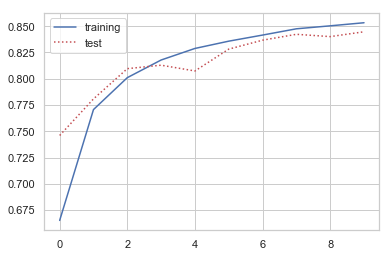

In [13]:
# epochs = 10
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

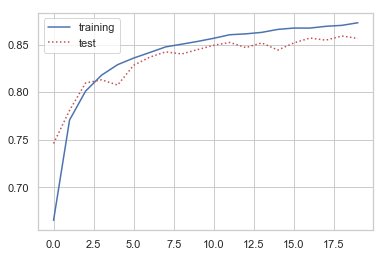

In [17]:
# epochs = 20
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [25]:
np.random.seed(0)

model3 = Sequential()

model3.add(Conv2D(4, (5, 5), activation='relu', input_shape=(28, 28, 1), kernel_initializer="glorot_uniform"))
model3.add(MaxPooling2D())
model3.add(Conv2D(4, (5, 5), activation='relu', kernel_initializer="glorot_uniform"))
model3.add(MaxPooling2D())
model3.add(Flatten())
model3.add(Dense(10, activation='softmax', kernel_initializer="glorot_uniform"))
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adadelta())

In [26]:
hist3 = model3.fit(X_train, Y_train, epochs=10, batch_size=600, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 13s - loss: 1.2832 - acc: 0.5554 - val_loss: 0.7593 - val_acc: 0.7159
Epoch 2/10
 - 13s - loss: 0.6818 - acc: 0.7482 - val_loss: 0.6313 - val_acc: 0.7699
Epoch 3/10
 - 13s - loss: 0.5989 - acc: 0.7806 - val_loss: 0.5959 - val_acc: 0.7848
Epoch 4/10
 - 13s - loss: 0.5562 - acc: 0.7977 - val_loss: 0.5581 - val_acc: 0.8011
Epoch 5/10
 - 14s - loss: 0.5304 - acc: 0.8090 - val_loss: 0.5416 - val_acc: 0.8077
Epoch 6/10
 - 15s - loss: 0.5127 - acc: 0.8167 - val_loss: 0.5191 - val_acc: 0.8124
Epoch 7/10
 - 14s - loss: 0.4986 - acc: 0.8222 - val_loss: 0.5111 - val_acc: 0.8193
Epoch 8/10
 - 14s - loss: 0.4879 - acc: 0.8257 - val_loss: 0.5069 - val_acc: 0.8196
Epoch 9/10
 - 14s - loss: 0.4795 - acc: 0.8282 - val_loss: 0.5013 - val_acc: 0.8188
Epoch 10/10
 - 14s - loss: 0.4716 - acc: 0.8323 - val_loss: 0.4878 - val_acc: 0.8260


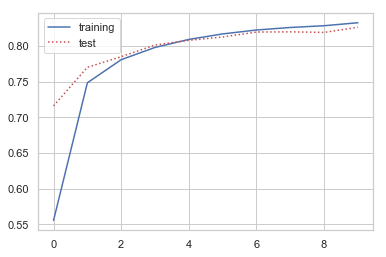

In [27]:
# epochs = 10
plt.plot(hist3.history['acc'], 'b-', label="training")
plt.plot(hist3.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

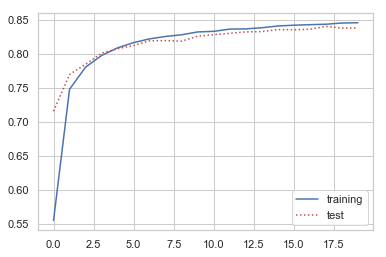

In [23]:
# epochs = 20
plt.plot(hist3.history['acc'], 'b-', label="training")
plt.plot(hist3.history['val_acc'], 'r:', label='test')
plt.legend()
plt.show()

In [28]:
from keras.applications.vgg16 import VGG16, decode_predictions

In [30]:
model = VGG16()

553467904/553467096 [==============================] - 1764s 3us/step


In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=["accuracy"])

이후 pickle이 실행되지 않음